# # Check if points on Leukocyte trajectory 

Part 1: get standard curve. 

    1: get DC ftr file & extract leu meadian l,a,b 
    -merge ftr file: 'all_points_trajectory.csv'  with ftr_lbl : 'all_points_trajectory_lel.txt'.
    -pick out useful info into another df and save is as 'dcLeuLab.csv'
        -df2=df[[' 2 SolID',' 3 UploadID',' 33 VisAgree_LEU','703 CTP_leu_lab_l_median','704       CTP_leu_lab_a_median','705 CTP_leu_lab_b_median']]    # df2.to_csv('dcLeuLab.csv')

    2: group 'dcLeuLab' by VR agrrement ' 33 VisAgree_LEU'. ' 33 VisAgree_LEU' has 0,1,2,3,4,5 values. 0 means 3 VR not agree, 1,2,3,4,5 means VR agreen with 1,2,3,4,5 levels where 1 represent negative. 
    
    3: 
    
Part 2: get target points 

    1: get 10/10 study data from "10_10_lab_value"
    2: Identify FN from 'update-2 report leu kinetic'
    3: save FN only l,a,b data @ '10_10_FN_data'.
    
    4: get 15/15 study data from "15_15_lab_value"
    5: Identify FN from google sheet km 260
    6: save FN only l,a,b data @ 'km260trajectory3d'
    
Part 3: Plot 
    See plot part 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# to process ftr file
ftrFileLabel     ='all_points_trajectory_lbl.txt'
ftrFile          ='all_points_trajectory.csv'
ftr_lbl=pd.read_csv (ftrFileLabel,names="N") 
labelArr=ftr_lbl['N']   # change to array so able to read as columns name
df=pd.read_csv (ftrFile,names=labelArr)

df2=df[['  2 SolID','  3 UploadID',' 33 VisAgree_LEU','703 CTP_leu_lab_l_median','704 CTP_leu_lab_a_median','705 CTP_leu_lab_b_median']]
#df2.to_csv('dcLeuLab.csv')

In [28]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


In [29]:
dfDc=pd.read_csv ('dcLeuLab.csv')  # L.A.B data for Leu from DC  5.7k rows 

In [30]:
vrGroups = dfDc.groupby(dfDc[' 33 VisAgree_LEU'])
notAgree = vrGroups.get_group(0)   # VR3 not agree
neg      = vrGroups.get_group(1)   # VR3 agreed called Neg
trace    = vrGroups.get_group(2)
small    = vrGroups.get_group(3)
mod      = vrGroups.get_group(4)
large    = vrGroups.get_group(5)

In [31]:
# L.A.B data for leu for 10/10 & 15/15 studies 
ten_ten=pd.read_excel('10_10_FN_data.xlsx')   # 10/10
dfKm260=pd.read_excel('km260trajectory3d.xlsx') # 15/15

# Plot part

<IPython.core.display.Javascript object>


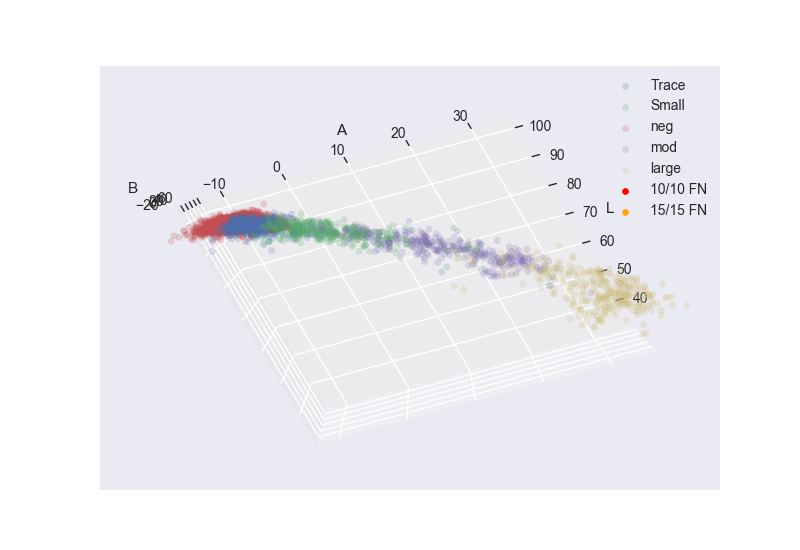

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.style.use('seaborn-deep')   # color style 
alpha=0.2
xs1 = trace['703 CTP_leu_lab_l_median']
ys1 = trace['704 CTP_leu_lab_a_median']
zs1 = trace['705 CTP_leu_lab_b_median']
ax.scatter(xs1, ys1, zs1 ,alpha=alpha,label='Trace')

xs2 = small['703 CTP_leu_lab_l_median']
ys2 = small['704 CTP_leu_lab_a_median']
zs2 = small['705 CTP_leu_lab_b_median']
ax.scatter(xs2, ys2, zs2 ,alpha=alpha,label='Small')

xs3 = neg['703 CTP_leu_lab_l_median']
ys3 = neg['704 CTP_leu_lab_a_median']
zs3 = neg['705 CTP_leu_lab_b_median']
ax.scatter(xs3, ys3, zs3 ,alpha=alpha,label='neg')

xs4 = mod['703 CTP_leu_lab_l_median']
ys4 = mod['704 CTP_leu_lab_a_median']
zs4 = mod['705 CTP_leu_lab_b_median']
ax.scatter(xs4, ys4, zs4 ,alpha=alpha,label='mod')

xs5 = large['703 CTP_leu_lab_l_median']
ys5 = large['704 CTP_leu_lab_a_median']
zs5 = large['705 CTP_leu_lab_b_median']
ax.scatter(xs5, ys5, zs5 ,alpha=alpha,label='large')


xs6 = ten_ten['CTP_leu_lab_l_median']
ys6 = ten_ten['CTP_leu_lab_a_median']
zs6 = ten_ten['CTP_leu_lab_b_median']
ax.scatter(xs6, ys6, zs6 ,c='red',label='10/10 FN')
labels=ten_ten['soln_name']
#for i in (1,3,5):
#    ax.text(xs[i], ys[i], zs[i],labels[i],color='red',size=7) 
#ax.text(xs[5], ys[5], zs[5],labels[5],color='red',size=8)
#ax.text(xs[4], ys[4], zs[4],labels[4],color='red',size=8)


xs9 = dfKm260['ctp_leu_lab_l_median']
ys9 = dfKm260['ctp_leu_lab_a_median']
zs9 = dfKm260['ctp_leu_lab_b_median']
ax.scatter(xs9, ys9, zs9, c='orange',label='15/15 FN')

ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')

plt.axis('equal')
plt.legend()


In [33]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

# only print Small and Trce part 

<IPython.core.display.Javascript object>


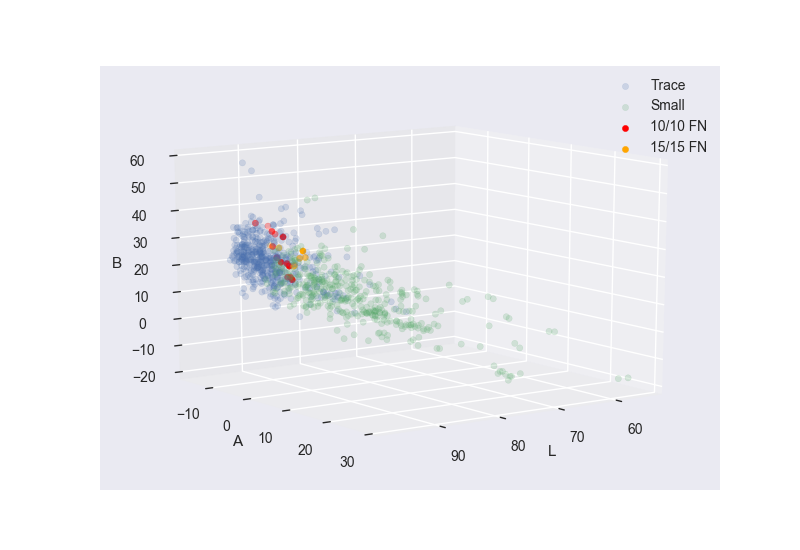

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plt.style.use('seaborn')
alpha=0.2
xs1 = trace['703 CTP_leu_lab_l_median']
ys1 = trace['704 CTP_leu_lab_a_median']
zs1 = trace['705 CTP_leu_lab_b_median']
ax.scatter(xs1, ys1, zs1 ,alpha=alpha,label='Trace')

xs2 = small['703 CTP_leu_lab_l_median']
ys2 = small['704 CTP_leu_lab_a_median']
zs2 = small['705 CTP_leu_lab_b_median']
#vr = neg[' 34 VisAgree_LEU']
ax.scatter(xs2, ys2, zs2 ,alpha=alpha,label='Small')

xs6 = ten_ten['CTP_leu_lab_l_median']
ys6 = ten_ten['CTP_leu_lab_a_median']
zs6 = ten_ten['CTP_leu_lab_b_median']
ax.scatter(xs6, ys6, zs6 ,c='r',label='10/10 FN')
labels=ten_ten['soln_name']
#for i in (10,11,12):
#    ax.text(xs6[i], ys6[i], zs6[i],labels[i],color='red',size=7) 
#ax.text(xs[5], ys[5], zs[5],labels[5],color='red',size=8)
#ax.text(xs[4], ys[4], zs[4],labels[4],color='red',size=8)


xs9 = dfKm260['ctp_leu_lab_l_median']
ys9 = dfKm260['ctp_leu_lab_a_median']
zs9 = dfKm260['ctp_leu_lab_b_median']
ax.scatter(xs9, ys9, zs9, c='orange',label='15/15 FN')

ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')

#plt.axis('equal')
plt.legend()